In [ ]:
!pip install -qq tabulate

In [ ]:
from tabulate import tabulate
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import ElasticNet,Lasso,LogisticRegression,PassiveAggressiveClassifier,Perceptron,RidgeClassifier,SGDClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
chess_df=pd.read_csv('games.csv')
print(chess_df.shape)

(20058, 16)


In [ ]:
def plot_countplot(dt:pd.DataFrame='',c_name:str='',y_label:str='',fgsize:tuple=(6,4))->None:
  if y_label=='':
    plt.figure(figsize=fgsize)
    sns.countplot(dt[c_name])
    plt.title(f'Count Plot of {c_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
  else:
    plt.figure(figsize=fgsize)
    sns.countplot(x=c_name,hue=y_label,data=dt)
    plt.title(f'Countplot of {c_name}')
    plt.tight_layout()
    plt.show()
  return None

def plot_histogram(df:np.ndarray='',c_name:str='',bin:int=20,fgsize:tuple=(6,4))->None:
  plt.figure(figsize=fgsize)
  sns.histplot(df,bins=bin,kde=True)
  plt.title(f'Histogram of {c_name}')
  plt.tight_layout()
  plt.show()
  return None

def plot_boxplot(df:np.ndarray='',c_name:str='',fgsize:tuple=(6,4))->None:
  plt.figure(figsize=fgsize)
  sns.boxplot(df)
  plt.title(f'Boxplot of {c_name}')
  plt.xlabel(c_name)
  plt.tight_layout()
  plt.show()
  return None

def plot_barplot(dt:pd.DataFrame='',c_name:str='',y_label:str='',fgsize:tuple=(6,4))->None:
  plt.figure(figsize=fgsize)
  sns.barplot(x=y_label,y=c_name,data=dt)
  plt.title(f'Barplot of {c_name}')
  plt.tight_layout()
  plt.show()
  return None

def get_basic_eda(df:pd.DataFrame)->None:
  pprint("First row of the dataset:")
  pprint(df.iloc[0].to_dict())
  pprint('='*50)
  pprint("Shape of the dataset:")
  pprint(df.shape)
  pprint('='*50)
  pprint("Missing values:")
  pprint(df.isnull().sum())
  pprint('='*50)
  pprint("Data Info:")
  pprint(df.info())
  pprint('='*50)
  duplicate_rows=df[df.duplicated()].shape
  if duplicate_rows[0] > 0:
      pprint("Duplicate rows found!")
      pprint(duplicate_rows)
  else:
      pprint("No duplicate rows found.")
  del duplicate_rows
  pprint('='*50)
  return None

def plot_descriptive_statistics(df:pd.DataFrame='',descp_flag:bool=False,uni_variate_flag:bool=False,target_name:str='',bi_variate_flag:bool=False,fgsize:tuple=(6,4))->None:
  if descp_flag:
    pprint("Summary statistics:")
    for idx,row in df.describe(include='all').iterrows():
      print(idx+" : ")
      pprint(str({k:v for k,v in row.items() if str(v)!='nan'}))
      print()
    pprint('='*50)
  if uni_variate_flag:
    categorical_columns:list=list(df.select_dtypes(include=['object']).columns)
    if categorical_columns:
      pprint('*'*40)
      pprint("Uni-Variante Analysis")
      pprint('*'*40)
      pprint("Distribution of categorical variables:")
      for column in categorical_columns:
        temp_df=df[column].value_counts()
        if temp_df.shape[0]<10:
          pprint(f"\nDistribution of {column}:")
          pprint(temp_df)
          plot_countplot(dt=df,c_name=column,fgsize=fgsize)
          print()
        del temp_df
      pprint('='*50)
    numerical_columns:list=[x for x in df.columns if x not in categorical_columns]
    if numerical_columns:
      pprint('*'*40)
      pprint("Uni-Variante Analysis")
      pprint('*'*40)
      pprint("Distribution of numerical variables:")
      for column in numerical_columns:
        plot_histogram(df=df[column],c_name=column,bin=20,fgsize=fgsize)
        plot_boxplot(df=df[column],c_name=column,fgsize=fgsize)
      pprint('='*50)
  if bi_variate_flag:
    categorical_columns:list=list(df.select_dtypes(include=['object']).columns)
    numerical_columns:list=[x for x in df.columns if x not in categorical_columns]
    if numerical_columns:
      pprint('*'*40)
      pprint("Bi-Variante Analysis")
      pprint('*'*40)
      pprint("Distribution of numerical variables:")
      for column in numerical_columns:
        plot_barplot(dt=df,c_name=column,y_label=target_name,fgsize=fgsize)
      pprint('='*50)
    if categorical_columns:
      pprint('*'*40)
      pprint("Bi-Variante Analysis")
      pprint('*'*40)
      pprint("Distribution of categorical variables:")
      for column in categorical_columns:
        plot_countplot(dt=df,c_name=column,y_label=target_name,fgsize=fgsize)
      pprint('='*50)
  return None

In [ ]:
get_basic_eda(df=chess_df)

'First row of the dataset:'
{'black_id': 'skinnerua',
 'black_rating': 1261,
 'created_at': 1504130000000.0,
 'game_time_duration': 0.0,
 'id': 'l1NXvwaE',
 'increment_code': '5+10',
 'last_move_at': 1504130000000.0,
 'moves': 'd4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+',
 'opening_eco': 'B00',
 'opening_name': 'Nimzowitsch Defense: Kennedy Variation',
 'opening_ply': 4,
 'rated': True,
 'turns': 16,
 'victory_status': 'resign',
 'white_id': 'a-00',
 'white_rating': 1322,
 'winner': 'black'}
'=================================================='
'Shape of the dataset:'
(17114, 17)
'=================================================='
'Missing values:'
id                    0
rated                 0
created_at            0
last_move_at          0
turns                 0
victory_status        0
winner                0
increment_code        0
white_id              0
white_rating          0
black_id              0
black_rating          0
moves                 0
opening_e

In [ ]:
plot_descriptive_statistics(df=chess_df,descp_flag=True)

'Summary statistics:'
count : 
("{'id': 20058, 'rated': 20058, 'created_at': 20058.0, 'last_move_at': "
 "20058.0, 'turns': 20058.0, 'victory_status': 20058, 'winner': 20058, "
 "'increment_code': 20058, 'white_id': 20058, 'white_rating': 20058.0, "
 "'black_id': 20058, 'black_rating': 20058.0, 'moves': 20058, 'opening_eco': "
 "20058, 'opening_name': 20058, 'opening_ply': 20058.0}")

unique : 
("{'id': 19113, 'rated': 2, 'victory_status': 4, 'winner': 3, "
 "'increment_code': 400, 'white_id': 9438, 'black_id': 9331, 'moves': 18920, "
 "'opening_eco': 365, 'opening_name': 1477}")

top : 
("{'id': 'XRuQPSzH', 'rated': True, 'victory_status': 'resign', 'winner': "
 "'white', 'increment_code': '10+0', 'white_id': 'taranga', 'black_id': "
 "'taranga', 'moves': 'e4 e5', 'opening_eco': 'A00', 'opening_name': "
 '"Van\'t Kruijs Opening"}')

freq : 
("{'id': 5, 'rated': 16155, 'victory_status': 11147, 'winner': 10001, "
 "'increment_code': 7721, 'white_id': 72, 'black_id': 82, 'moves': 27, "
 

In [ ]:
chess_df=chess_df.drop_duplicates()
print(chess_df.shape)

(19629, 16)


In [ ]:
# filtering only for resign and check mate games and ignoring draw and out of time cases
chess_df=chess_df[chess_df['victory_status'].isin(['resign','mate'])]
print(chess_df.shape)

(17114, 16)


In [ ]:
plot_descriptive_statistics(df=chess_df,descp_flag=True)

'Summary statistics:'
count : 
("{'id': 17114, 'rated': 17114, 'created_at': 17114.0, 'last_move_at': "
 "17114.0, 'turns': 17114.0, 'victory_status': 17114, 'winner': 17114, "
 "'increment_code': 17114, 'white_id': 17114, 'white_rating': 17114.0, "
 "'black_id': 17114, 'black_rating': 17114.0, 'moves': 17114, 'opening_eco': "
 "17114, 'opening_name': 17114, 'opening_ply': 17114.0}")

unique : 
("{'id': 16669, 'rated': 2, 'victory_status': 2, 'winner': 2, "
 "'increment_code': 389, 'white_id': 8484, 'black_id': 8363, 'moves': 16520, "
 "'opening_eco': 353, 'opening_name': 1411}")

top : 
("{'id': 'YPVYpEvm', 'rated': True, 'victory_status': 'resign', 'winner': "
 "'white', 'increment_code': '10+0', 'white_id': 'bleda', 'black_id': "
 "'king5891', 'moves': 'e4 e5', 'opening_eco': 'A00', 'opening_name': "
 '"Van\'t Kruijs Opening"}')

freq : 
("{'id': 2, 'rated': 13822, 'victory_status': 10926, 'winner': 9000, "
 "'increment_code': 6544, 'white_id': 42, 'black_id': 38, 'moves': 20, "
 "'

###### Total duration of the game

In [ ]:
chess_df['game_time_duration']=chess_df['last_move_at'] - chess_df['created_at']

In [ ]:
plot_descriptive_statistics(df=chess_df[['game_time_duration']],descp_flag=True)

'Summary statistics:'
count : 
"{'game_time_duration': 17114.0}"

mean : 
"{'game_time_duration': 798963.8137781933}"

std : 
"{'game_time_duration': 4997286.6744319135}"

min : 
"{'game_time_duration': 0.0}"

25% : 
"{'game_time_duration': 0.0}"

50% : 
"{'game_time_duration': 194329.5}"

75% : 
"{'game_time_duration': 714374.0}"

max : 
"{'game_time_duration': 605844701.0}"

'=================================================='


In [ ]:
zero_games=chess_df[chess_df['game_time_duration']==0].shape[0]
print(f'Number of games that had zero duration: #{zero_games},which makes up {round(zero_games/chess_df.shape[0],2)*100}% of all games')
del zero_games

Number of games that had zero duration: #7547, which makes up 44.0% of all games


In [ ]:
chess_df[chess_df['game_time_duration']==0].head(1).T

,1
id,l1NXvwaE
rated,True
created_at,1504130000000.0
last_move_at,1504130000000.0
turns,16
victory_status,resign
winner,black
increment_code,5+10
white_id,a-00
white_rating,1322


###### Number of Turns

In [ ]:
plot_descriptive_statistics(df=chess_df[['turns']],descp_flag=True)

'Summary statistics:'
count : 
"{'turns': 17114.0}"

mean : 
"{'turns': 58.05212107046862}"

std : 
"{'turns': 31.461237623443203}"

min : 
"{'turns': 1.0}"

25% : 
"{'turns': 36.0}"

50% : 
"{'turns': 53.0}"

75% : 
"{'turns': 75.0}"

max : 
"{'turns': 222.0}"

'=================================================='


'****************************************'
'Uni-Variante Analysis'
'****************************************'
'Distribution of numerical variables:'


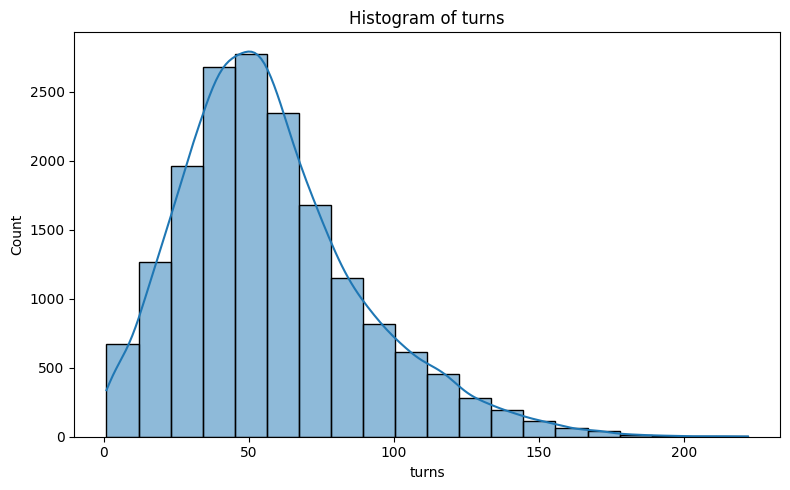

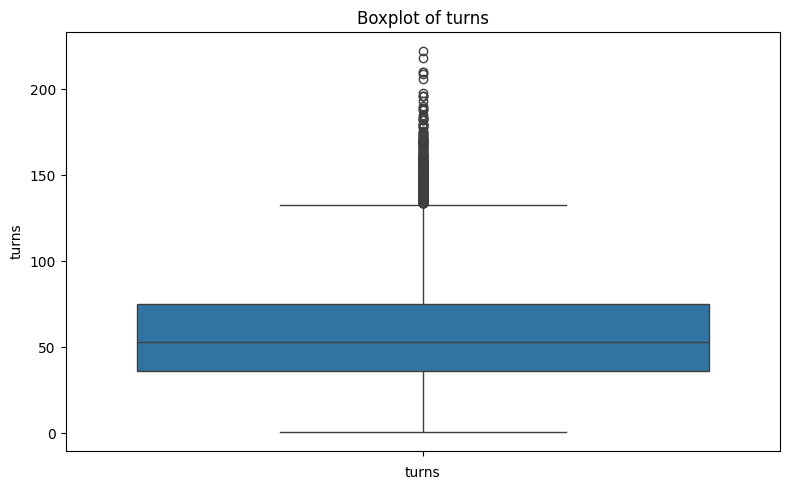

'=================================================='


In [ ]:
plot_descriptive_statistics(df=chess_df[['turns']],uni_variate_flag=True,fgsize=(8,5))

In [ ]:
min_threshold:int=6
below_threshold=chess_df[chess_df['turns']<min_threshold].shape[0]
print(f'Number of turns less than {min_threshold} : #{below_threshold},which makes up {round(below_threshold/chess_df.shape[0],2)*100}% of all games')
del min_threshold,below_threshold

Number of turns less than 6 : #284, which makes up 2.0% of all games


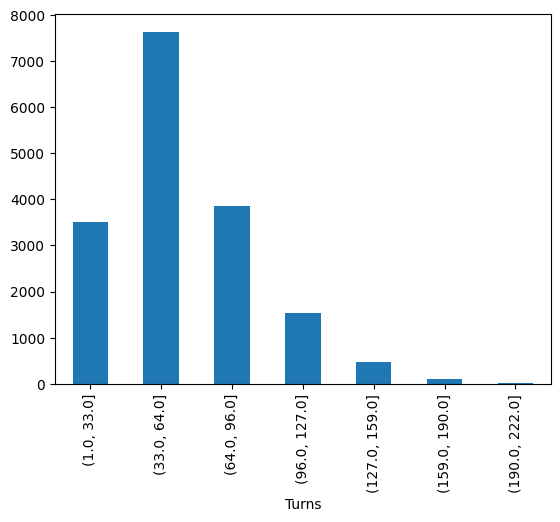

In [ ]:
chess_df['turns_binned']=pd.cut(x=chess_df['turns'],bins=7,precision=0)
chess_df['turns_binned'].value_counts().sort_index().plot.bar(xlabel='Turns')
plt.show()

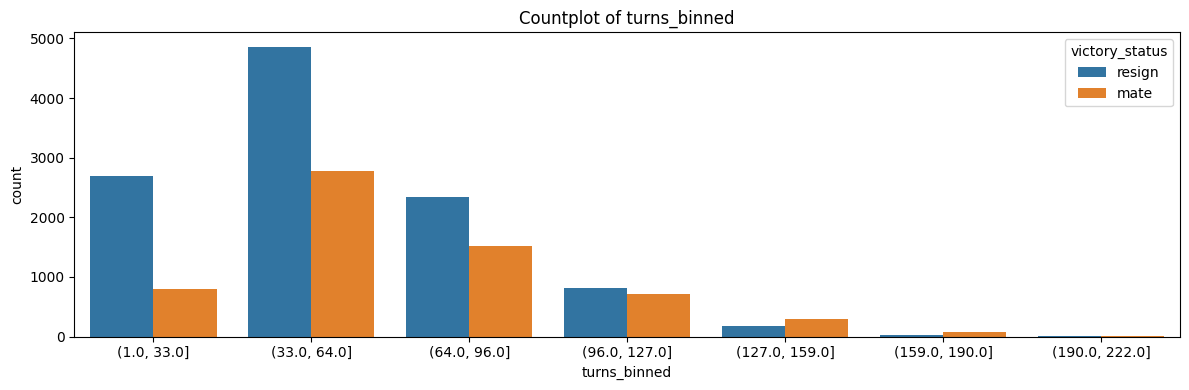

In [ ]:
plot_countplot(dt=chess_df,c_name='turns_binned',y_label='victory_status',fgsize=(12,4))

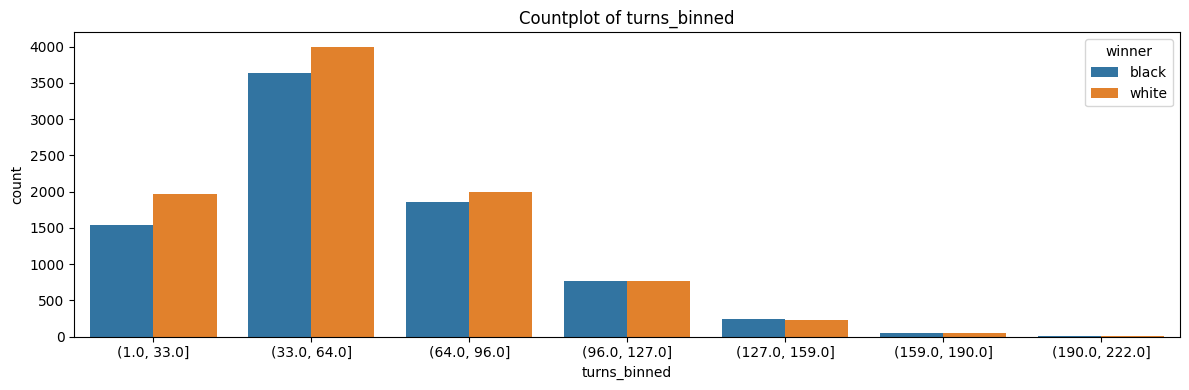

In [ ]:
plot_countplot(dt=chess_df,c_name='turns_binned',y_label='winner',fgsize=(12,4))

For more details,refer to [Chess.com](https://www.chess.com/forum/view/general/standard-blitz-and-bullet "Chess.com Homepage")

 - Bullet=1 or 2 minutes
 - Blitz=3 to 14 minutes
 - Standard=15 minutes and more

In [ ]:
chess_df[['initial_time','step_per_move']]=chess_df['increment_code'].str.split('+',expand=True)
chess_df['initial_time']=chess_df['initial_time'].astype(int)
chess_df['step_per_move']=chess_df['step_per_move'].astype(int)

def categorize_time(init_time):
  if init_time < 3:
    return 'Bullet'
  elif init_time > 14:
    return 'Standard'
  else:
    return 'Blitz'

chess_df['game_type']=chess_df['initial_time'].apply(categorize_time)
del categorize_time

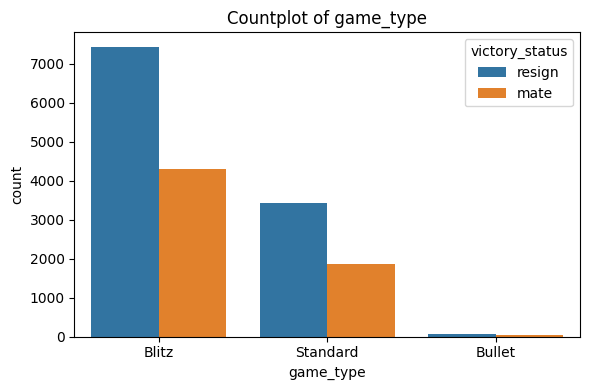

In [ ]:
plot_countplot(dt=chess_df,c_name='game_type',y_label='victory_status')

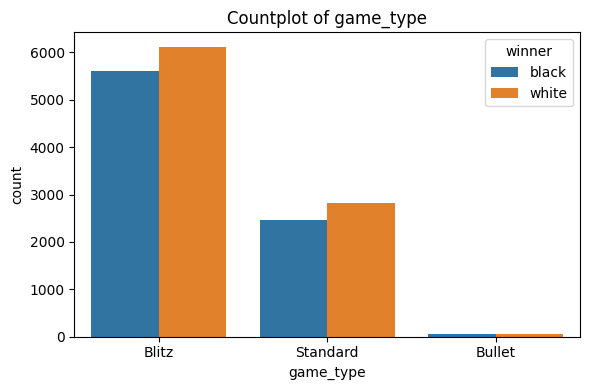

In [ ]:
plot_countplot(dt=chess_df,c_name='game_type',y_label='winner')

For more details,refer to:
- [ECO code CSV sheet](https://lichess.org/forum/general-chess-discussion/eco-code-csv-sheet "Lichess.org Homepage")
- [ECO Codes](https://www.365chess.com/eco.php "365Chess.com Homepage")
- [Chess Opening Reference](https://docs.google.com/spreadsheets/d/1CehtdBIt5cOkRy6mbgMJlLjvfK1StGsqiKVCkeh9uqQ/edit#gid=0 "Shared GoogleSheet")

In [ ]:
eco_codes=pd.read_csv('Chess Opening Reference - Sheet1.csv',usecols=['ECO Code','Name'])
print(eco_codes.shape)

(500, 2)


In [ ]:
eco_codes.head()

,ECO Code,Name
0,A00,Uncommon Opening
1,A01,Nimzovich-Larsen Attack
2,A02,Bird's Opening
3,A03,Bird's Opening
4,A04,Reti Opening


In [ ]:
eco_codes['Name'].nunique()

302

In [ ]:
eco_codes['ECO_Names']=eco_codes['Name'].str.split(',',expand=True)[0]

for word1 in [' Defense',' Attack',' Opening',' Accepted',' Declined',' Game',' (Tartakower Variation)',]:
  eco_codes['ECO_Names']=eco_codes['ECO_Names'].str.replace(word1,'',regex=False).str.strip()
del word1

cleaned_names={
  "Queen's Gambit Semi-Slav" : "Queen's Gambit",
  "Queen's Gambit Slav" : "Queen's Gambit",
  "Queen's Pawn (with ...d6)" : "Queen's Pawn",
  "Uncommon King's Pawn" : 'Uncommon',
  'English with b3' : 'English',
}

eco_codes['ECO_Names']=eco_codes['ECO_Names'].replace(cleaned_names)
del cleaned_names

In [ ]:
eco_codes['ECO_Names'].nunique()

46

In [ ]:
eco_codes['ECO_Names'].drop_duplicates().tolist()

['Uncommon',
 'Nimzovich-Larsen',
 "Bird's",
 'Reti',
 "King's Indian",
 'English',
 "Queen's Pawn",
 'Modern',
 'Old Benoni',
 "Queen's Indian",
 'Budapest Gambit',
 'Old Indian',
 'Benoni',
 'Benko Gambit',
 'Dutch',
 'Scandinavian',
 "Alekhine's",
 'Robatsch',
 'Pirc',
 'Caro-Kann',
 'Sicilian',
 'French',
 "King's Pawn",
 'Center',
 "Bishop's",
 'Vienna',
 'Vienna Gambit',
 "King's Gambit",
 "King's Knight",
 'Philidor',
 'Petrov',
 'Scotch',
 'Three Knights',
 'Four Knights',
 'Giuoco Piano',
 'Evans Gambit',
 'Two Knights',
 'Ruy Lopez',
 'Richter-Veresov',
 'Torre',
 "Queen's Gambit",
 'Neo-Grunfeld',
 'Grunfeld',
 'Catalan',
 'Bogo-Indian',
 'Nimzo-Indian']

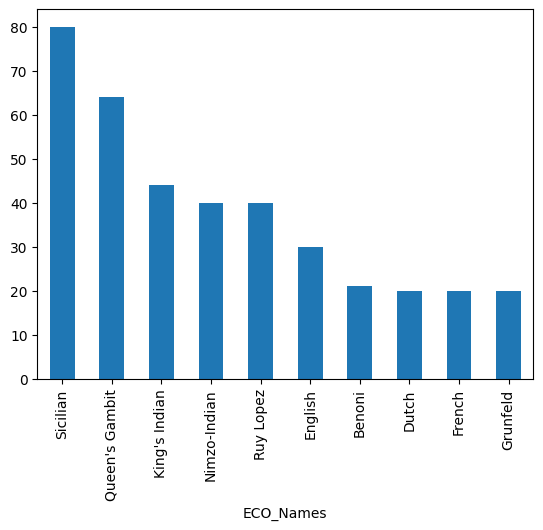

In [ ]:
eco_codes['ECO_Names'].value_counts().head(10).plot.bar(xlabel='ECO_Names')
plt.show()

In [ ]:
eco_codes=eco_codes[['ECO Code','ECO_Names']]
eco_codes.columns=['opening_eco','ECO_Names']
chess_df=pd.merge(left=chess_df,right=eco_codes,on=['opening_eco'],how='left')
del eco_codes

In [ ]:
chess_df['ECO_Names'].nunique()

46

In [ ]:
chess_df['ECO_Names'].isnull().sum()

0

In [ ]:
chess_df['ECO_Names'].value_counts()

ECO_Names
Sicilian            2230
Queen's Pawn        2014
Uncommon            1407
French              1272
Queen's Gambit      1085
King's Pawn          919
Ruy Lopez            737
Scandinavian         619
Philidor             586
English              575
Giuoco Piano         556
Caro-Kann            470
Two Knights          407
King's Knight        384
Reti                 361
Pirc                 310
Petrov               300
King's Indian        283
Scotch               247
Bishop's             231
Three Knights        228
Center               217
King's Gambit        209
Alekhine's           161
Robatsch             149
Nimzovich-Larsen     133
Bird's               130
Vienna               128
Nimzo-Indian         125
Four Knights         121
Dutch                110
Richter-Veresov       78
Old Benoni            69
Grunfeld              55
Queen's Indian        39
Budapest Gambit       33
Evans Gambit          27
Benoni                21
Benko Gambit          19
Old Indian     

In [ ]:
top_opening_names:list=["Sicilian","Queen's Pawn","Uncommon","French","Queen's Gambit","King's Pawn","Ruy Lopez","Scandinavian","Philidor","English"]

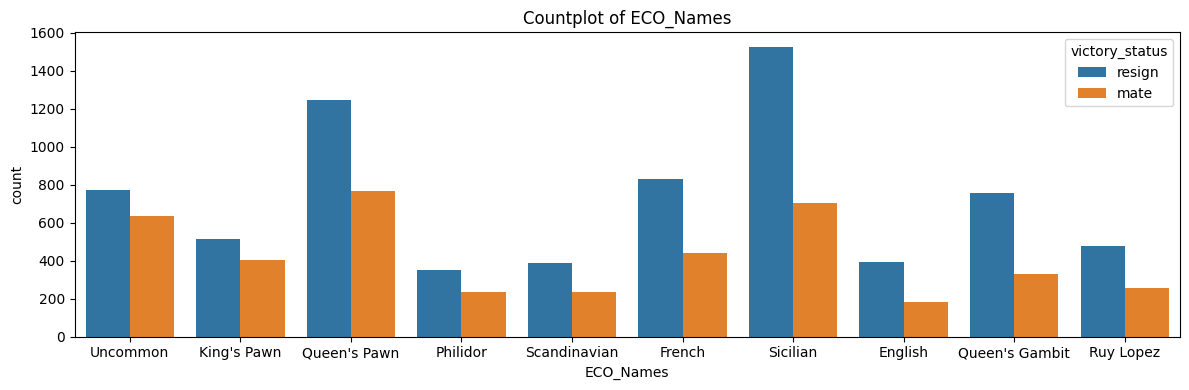

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='victory_status',fgsize=(12,4))

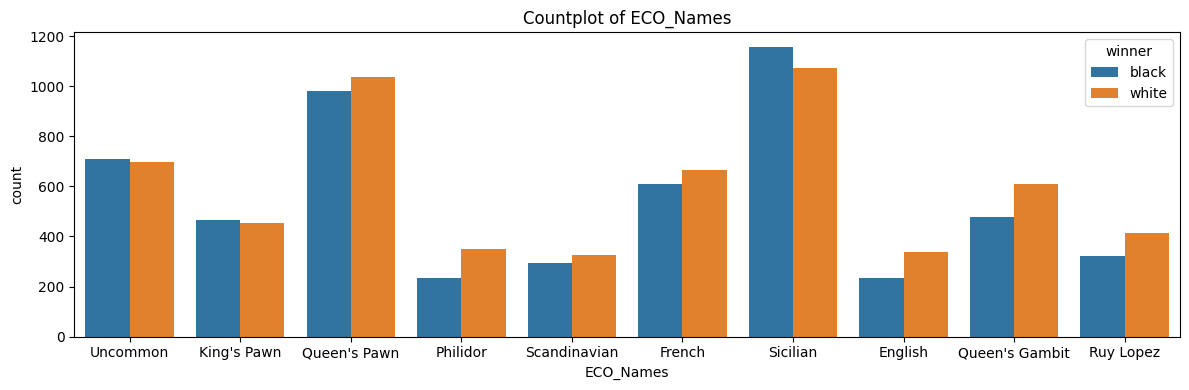

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='winner',fgsize=(12,4))

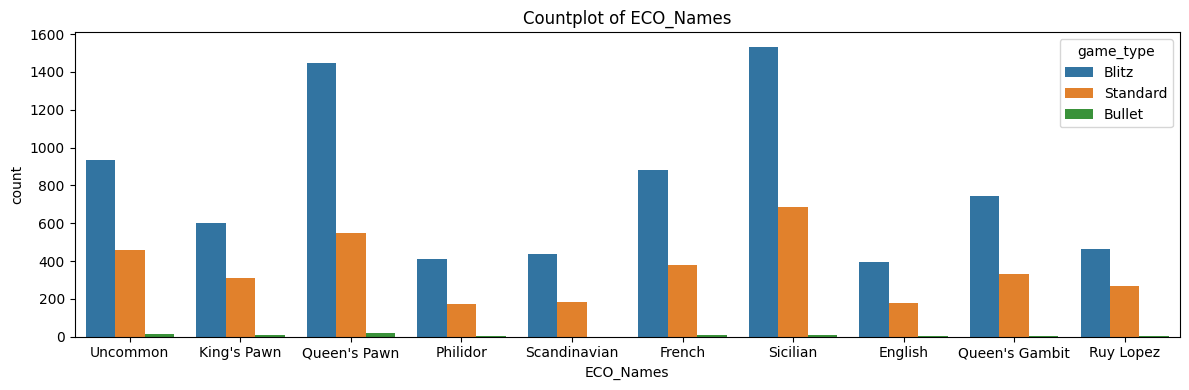

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='game_type',fgsize=(12,4))

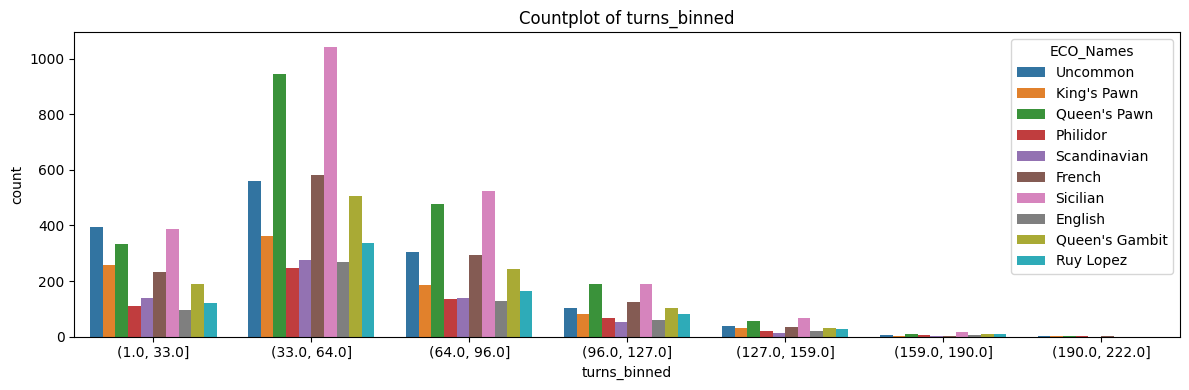

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='turns_binned',y_label='ECO_Names',fgsize=(12,4))

##### What is the general trend of white player vs black player

In [ ]:
winner_distribution_df=chess_df['winner'].value_counts()

white_players_df=chess_df[chess_df['winner']=='white']
average_white_rating=white_players_df['white_rating'].mean().round(4)
average_white_turns=white_players_df['turns'].mean().round(4)
white_players_df['z_score_white_rating']=((white_players_df['white_rating']-average_white_rating)/white_players_df['white_rating'].std().round(4))
average_white_duration=(white_players_df['last_move_at']-white_players_df['created_at']).mean().round(4)

black_players_df=chess_df[chess_df['winner']=='black']
average_black_rating=black_players_df['black_rating'].mean().round(4)
average_black_turns=black_players_df['turns'].mean().round(4)
black_players_df['z_score_black_rating']=((black_players_df['black_rating']-average_black_rating)/black_players_df['black_rating'].std().round(4))
average_black_duration=(black_players_df['last_move_at']-black_players_df['created_at']).mean().round(4)

print("General Trends of 'White' vs. 'Black' Players")
print("\nMean Rating (White):",average_white_rating," vs Mean Rating (Black):",average_black_rating)
print("\nMean Turns (White):",average_white_turns," vs Mean Turns (Black):",average_black_turns)
print("\nMean Match Duration (White):",average_white_duration," vs Mean Match Duration (Black):",average_black_duration)
print("\nDistribution of Winners:",winner_distribution_df)
del average_black_duration,average_black_rating,average_black_turns,average_white_duration,average_white_rating,average_white_turns,winner_distribution_df

General Trends of 'White' vs. 'Black' Players

Mean Rating (White): 1633.2641  vs Mean Rating (Black): 1637.6974

Mean Turns (White): 56.5753  vs Mean Turns (Black): 59.6902

Mean Match Duration (White): 815772.4703  vs Mean Match Duration (Black): 780319.753

Distribution of Winners: winner
white    9000
black    8114
Name: count, dtype: int64


In [ ]:
plot_descriptive_statistics(df=white_players_df[['z_score_white_rating']],descp_flag=True)

'Summary statistics:'
count : 
"{'z_score_white_rating': 9000.0}"

mean : 
"{'z_score_white_rating': 3.8495276274690896e-08}"

std : 
"{'z_score_white_rating': 1.000000133347762}"

min : 
"{'z_score_white_rating': -2.942339080023712}"

25% : 
"{'z_score_white_rating': -0.6799716736356595}"

50% : 
"{'z_score_white_rating': -0.10831681597252212}"

75% : 
"{'z_score_white_rating': 0.6469605111218047}"

max : 
"{'z_score_white_rating': 3.695786418658537}"

'=================================================='


In [ ]:
def categorize_rating(score):
  if score < -0.68:
    return 'Low Rating'
  elif score > 0.646:
    return 'High Rating'
  else:
    return 'Mid Rating'

white_players_df['rating_level']=white_players_df['z_score_white_rating'].apply(categorize_rating)
del categorize_rating

In [ ]:
plot_descriptive_statistics(df=black_players_df[['z_score_black_rating']],descp_flag=True)

'Summary statistics:'
count : 
"{'z_score_black_rating': 8114.0}"

mean : 
"{'z_score_black_rating': 1.2690007381853336e-07}"

std : 
"{'z_score_black_rating': 0.9999999832745025}"

min : 
"{'z_score_black_rating': -2.948299173209199}"

25% : 
"{'z_score_black_rating': -0.6902570694087404}"

50% : 
"{'z_score_black_rating': -0.10316612242062119}"

75% : 
"{'z_score_black_rating': 0.6541464600847633}"

max : 
"{'z_score_black_rating': 3.4159056485791703}"

'=================================================='


In [ ]:
def categorize_rating(score):
  if score < -0.689:
    return 'Low Rating'
  elif score > 0.654:
    return 'High Rating'
  else:
    return 'Mid Rating'

black_players_df['rating_level']=black_players_df['z_score_black_rating'].apply(categorize_rating)
del categorize_rating

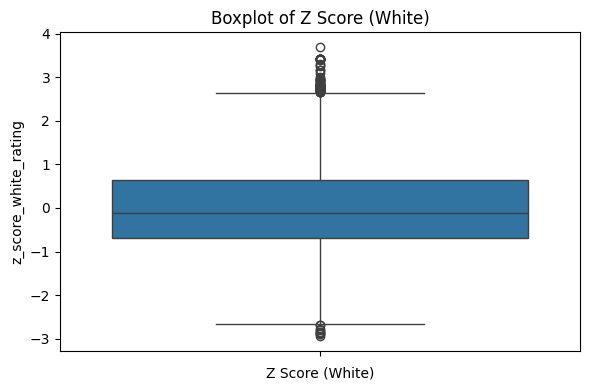

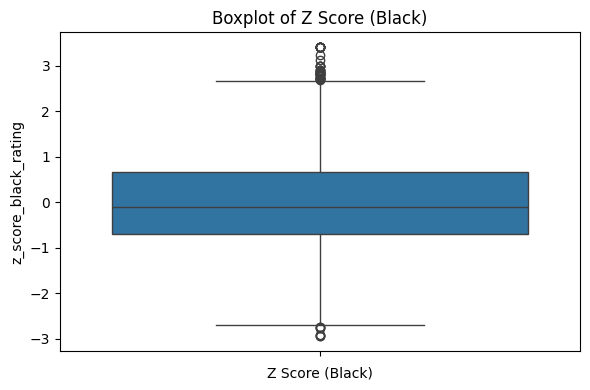

In [ ]:
plot_boxplot(df=white_players_df['z_score_white_rating'],c_name='Z Score (White)'),
plot_boxplot(df=black_players_df['z_score_black_rating'],c_name='Z Score (Black)')

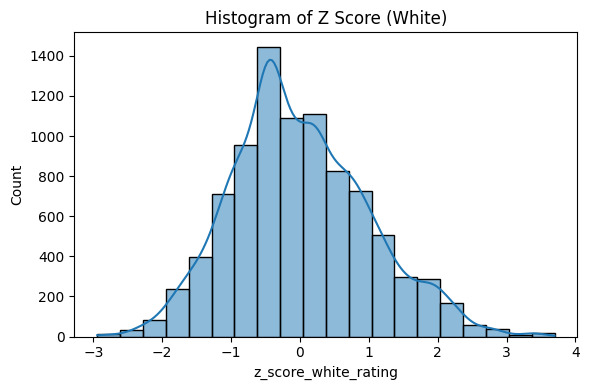

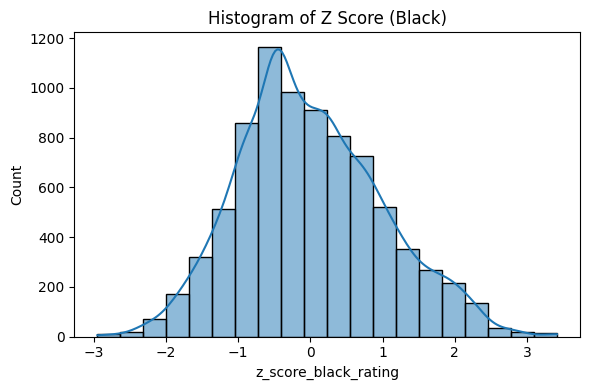

In [ ]:
plot_histogram(df=white_players_df['z_score_white_rating'],c_name='Z Score (White)'),
plot_histogram(df=black_players_df['z_score_black_rating'],c_name='Z Score (Black)')

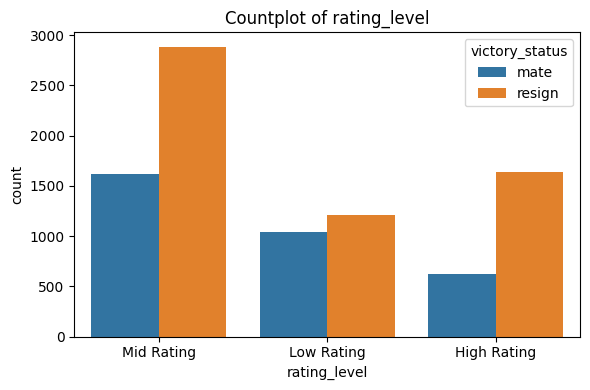

In [ ]:
plot_countplot(dt=white_players_df,c_name='rating_level',y_label='victory_status')

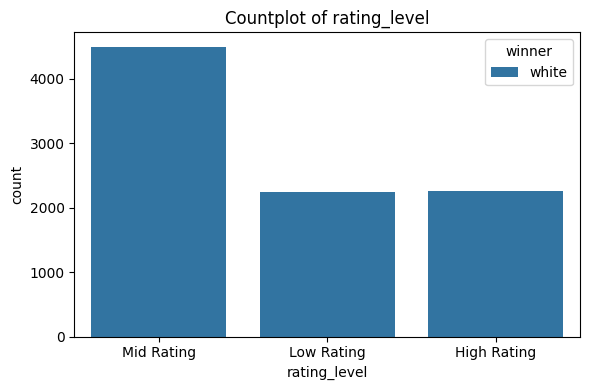

In [ ]:
plot_countplot(dt=white_players_df,c_name='rating_level',y_label='winner')

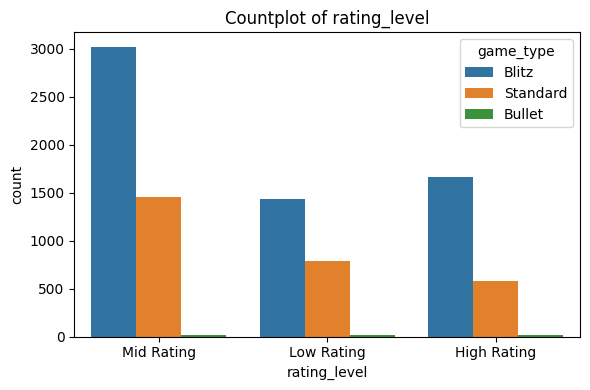

In [ ]:
plot_countplot(dt=white_players_df,c_name='rating_level',y_label='game_type')

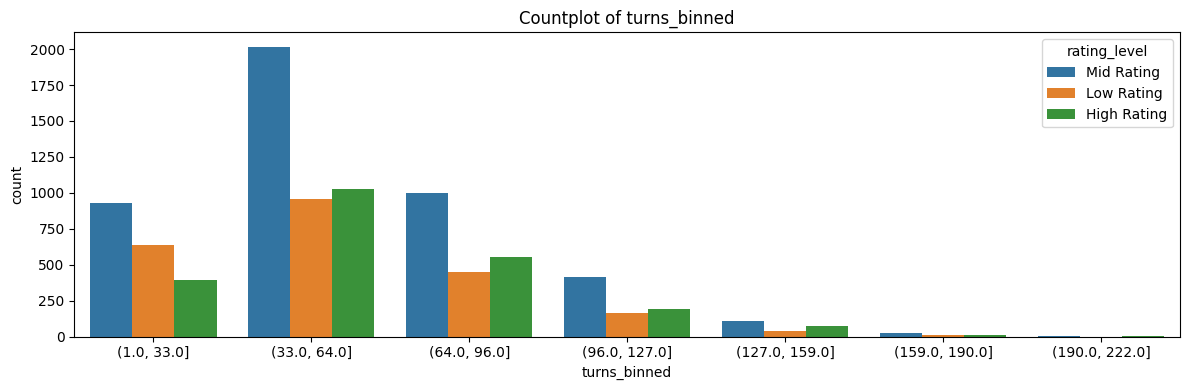

In [ ]:
plot_countplot(dt=white_players_df,c_name='turns_binned',y_label='rating_level',fgsize=(12,4))

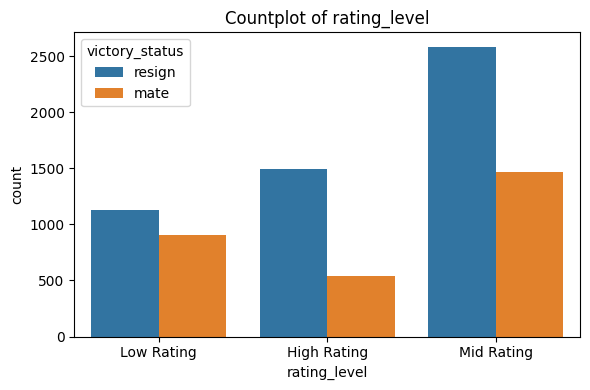

In [ ]:
plot_countplot(dt=black_players_df,c_name='rating_level',y_label='victory_status')

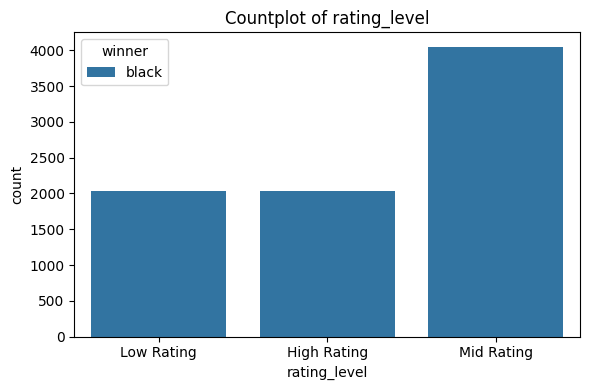

In [ ]:
plot_countplot(dt=black_players_df,c_name='rating_level',y_label='winner')

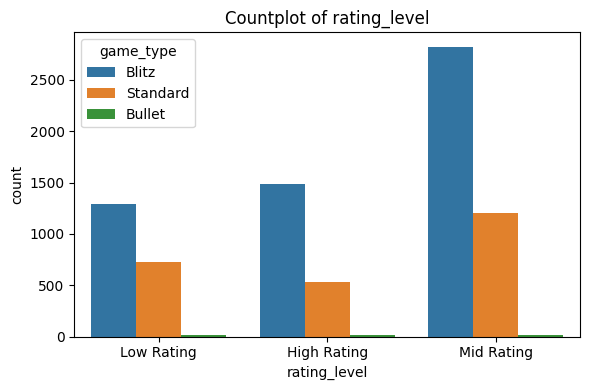

In [ ]:
plot_countplot(dt=black_players_df,c_name='rating_level',y_label='game_type')

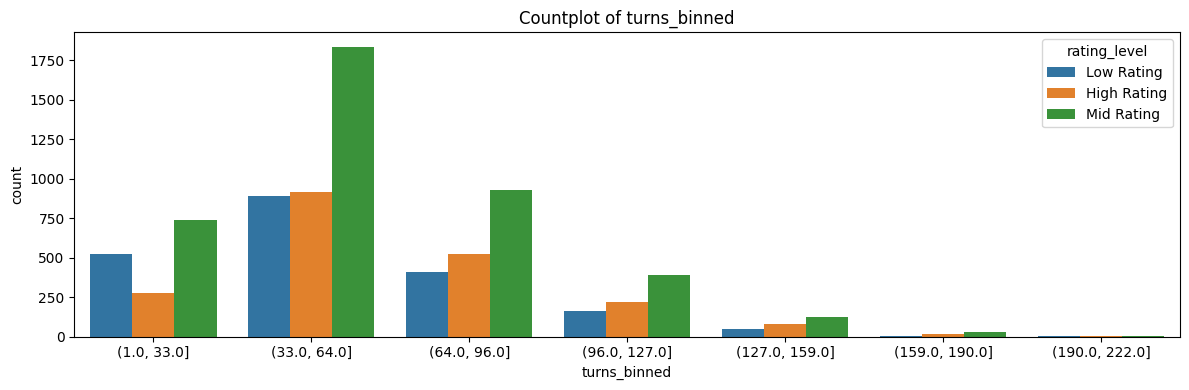

In [ ]:
plot_countplot(dt=black_players_df,c_name='turns_binned',y_label='rating_level',fgsize=(12,4))

In [ ]:
top_openings_white_df=white_players_df['ECO_Names'].value_counts().head(5)
top_openings_black_df=black_players_df['ECO_Names'].value_counts().head(5)
overall_openings_correlation=chess_df.groupby('ECO_Names')[['white_rating','black_rating']].mean()
print("\nOpenings with Respect to Player and Ranking:")
print("\nTop Openings for White Players:")
print(top_openings_white_df)
print("\nTop Openings for Black Players:")
print(top_openings_black_df)
print("\nCorrelation between Opening Names and Player's Ranking:")
print(overall_openings_correlation)
del top_openings_white_df,top_openings_black_df,overall_openings_correlation,black_players_df,white_players_df


Openings with Respect to Player and Ranking:

Top Openings for White Players:
ECO_Names
Sicilian          1073
Queen's Pawn      1035
Uncommon           696
French             664
Queen's Gambit     608
Name: count, dtype: int64

Top Openings for Black Players:
ECO_Names
Sicilian          1157
Queen's Pawn       979
Uncommon           711
French             608
Queen's Gambit     477
Name: count, dtype: int64

Correlation between Opening Names and Player's Ranking:
                  white_rating  black_rating
ECO_Names                                   
Alekhine's         1517.105590   1469.043478
Benko Gambit       1945.210526   1942.000000
Benoni             1878.571429   1855.476190
Bird's             1578.053846   1595.207692
Bishop's           1522.623377   1489.233766
Bogo-Indian        1997.666667   1751.833333
Budapest Gambit    1737.212121   1771.515152
Caro-Kann          1668.110638   1670.489362
Catalan            1940.500000   1667.333333
Center             1493.161290   1

In [ ]:
chess_df['rating_diff']=chess_df['white_rating'] - chess_df['black_rating']
chess_df['rating_diff']=chess_df['rating_diff'].abs()

In [ ]:
plot_descriptive_statistics(df=chess_df[['rating_diff']],descp_flag=True)

'Summary statistics:'
count : 
"{'rating_diff': 17114.0}"

mean : 
"{'rating_diff': 175.26136496435666}"

std : 
"{'rating_diff': 180.24064111954698}"

min : 
"{'rating_diff': 0.0}"

25% : 
"{'rating_diff': 46.0}"

50% : 
"{'rating_diff': 117.0}"

75% : 
"{'rating_diff': 247.0}"

max : 
"{'rating_diff': 1605.0}"

'=================================================='


In [ ]:
def categorize_rating(score):
  if score < 47:
    return 'Low Rating'
  elif score > 246:
    return 'High Rating'
  else:
    return 'Mid Rating'

chess_df['rating_level']=chess_df['rating_diff'].apply(categorize_rating)
del categorize_rating

'****************************************'
'Uni-Variante Analysis'
'****************************************'
'Distribution of numerical variables:'


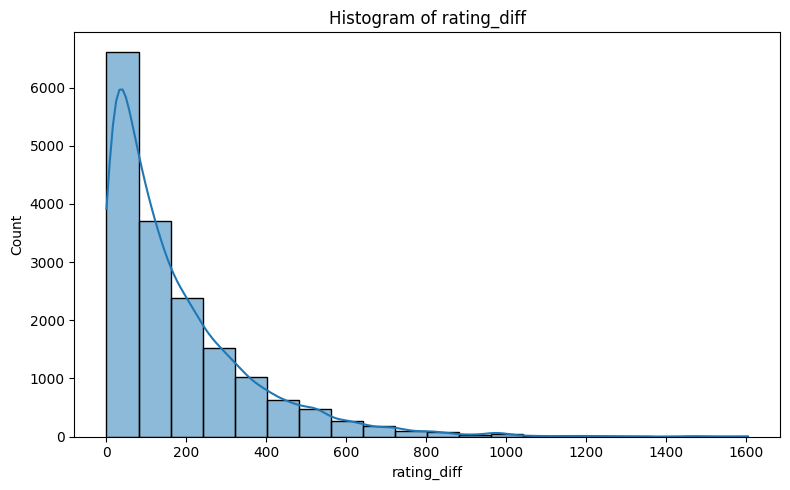

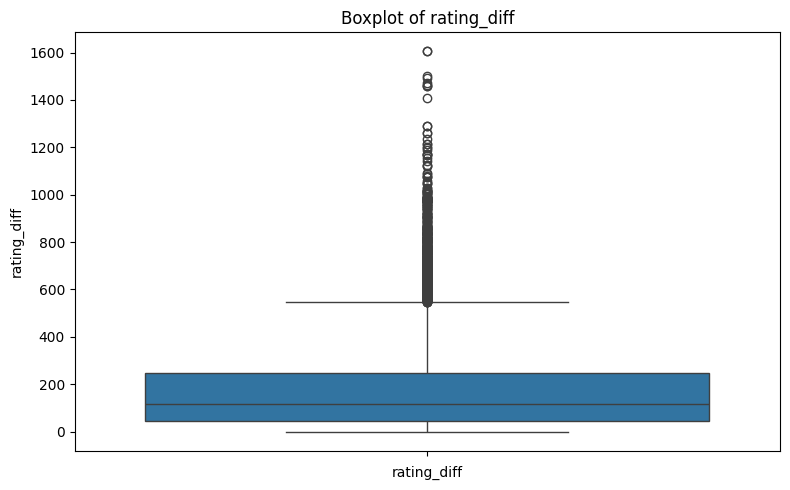

'=================================================='


In [ ]:
plot_descriptive_statistics(df=chess_df[['rating_diff']],uni_variate_flag=True,fgsize=(8,5))

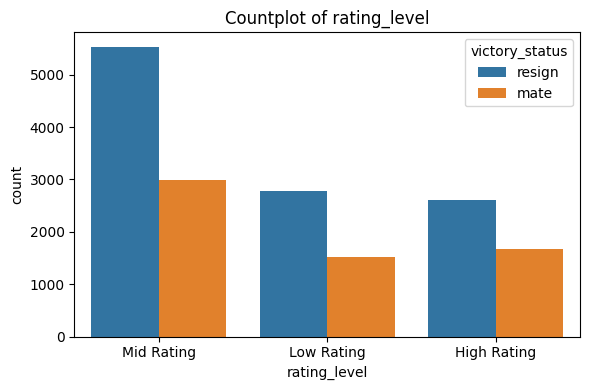

In [ ]:
plot_countplot(dt=chess_df,c_name='rating_level',y_label='victory_status')

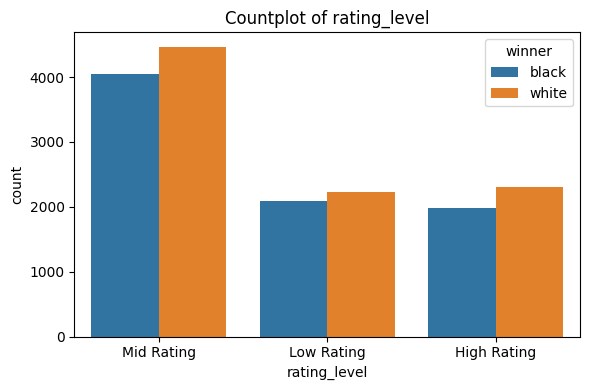

In [ ]:
plot_countplot(dt=chess_df,c_name='rating_level',y_label='winner')

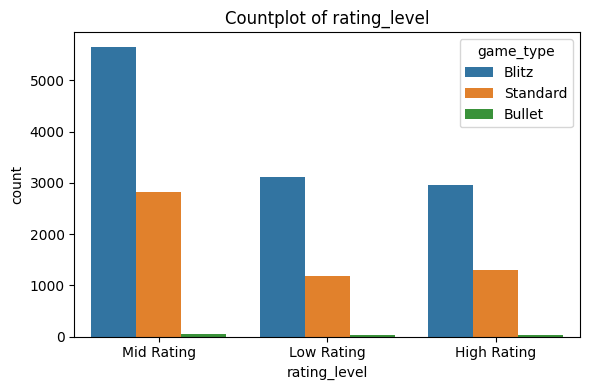

In [ ]:
plot_countplot(dt=chess_df,c_name='rating_level',y_label='game_type')

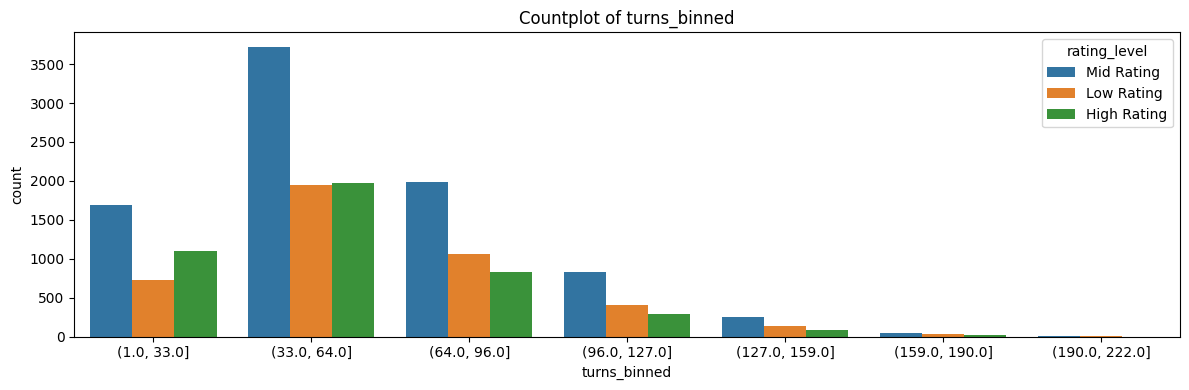

In [ ]:
plot_countplot(dt=chess_df,c_name='turns_binned',y_label='rating_level',fgsize=(12,4))

In [ ]:
chess_df=chess_df.drop(columns=['id','created_at','last_move_at','increment_code','white_id','black_id','opening_eco','opening_name','opening_ply','game_time_duration','step_per_move'])

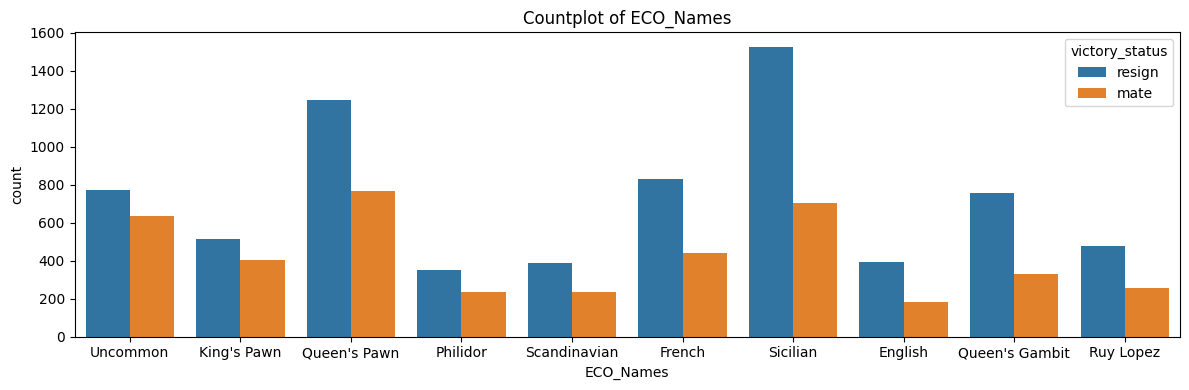

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='victory_status',fgsize=(12,4))

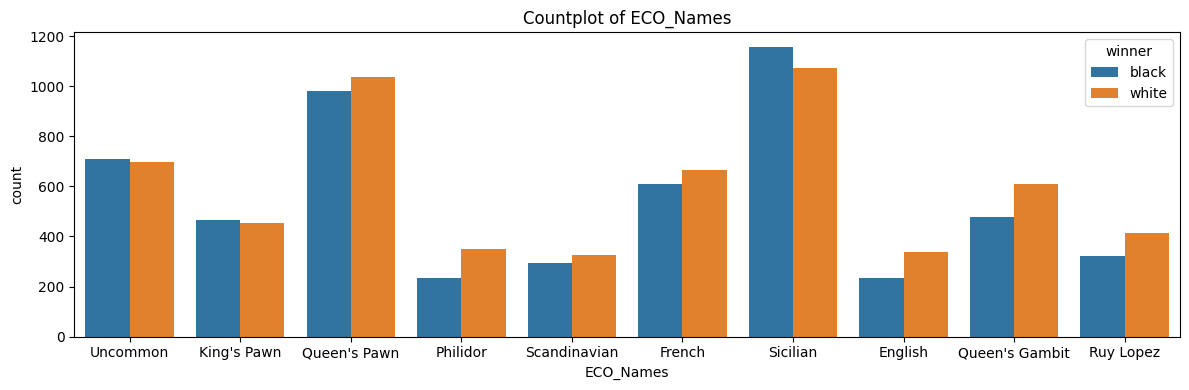

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='winner',fgsize=(12,4))

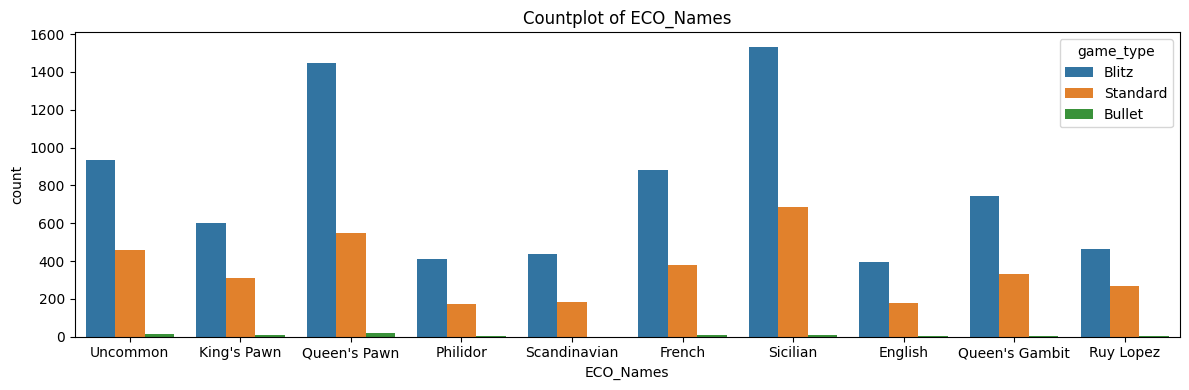

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='game_type',fgsize=(12,4))

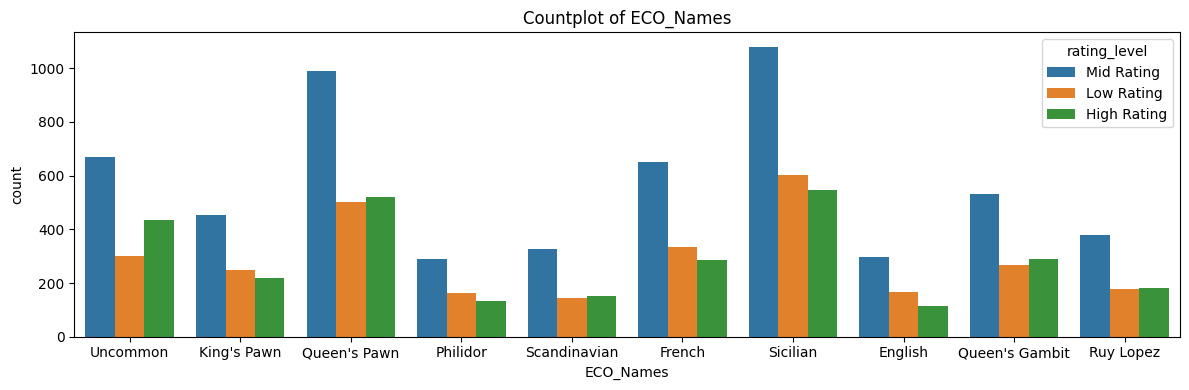

In [ ]:
plot_countplot(dt=chess_df[chess_df['ECO_Names'].isin(top_opening_names)],c_name='ECO_Names',y_label='rating_level',fgsize=(12,4))

In [ ]:
# randomly assign record as train (85%) and test (15%)
chess_df['train_test']=np.random.choice([1,0],size=len(chess_df),p=[0.85,0.15])
print(chess_df.shape)

(17114, 14)


### Objective: Given Features Predict the Outcome of the Game (Who will Win Player1 or Player2)

'****************************************'
'Uni-Variante Analysis'
'****************************************'
'Distribution of numerical variables:'


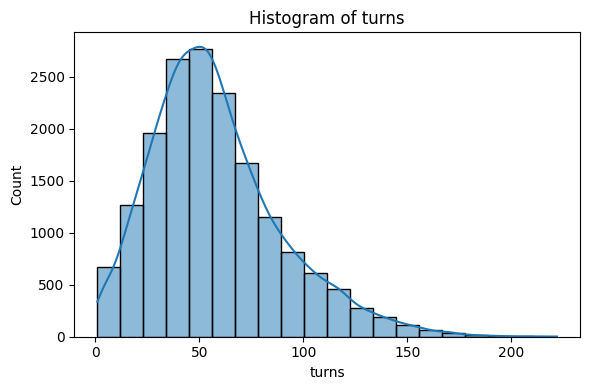

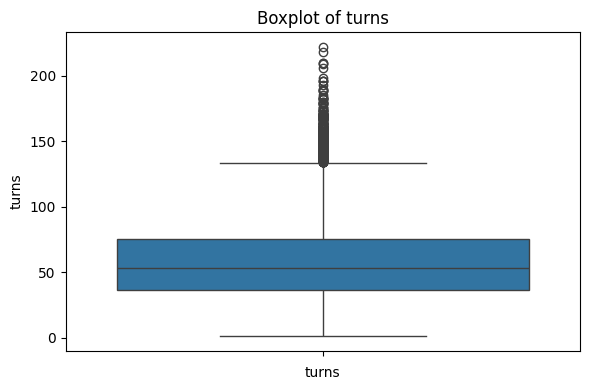

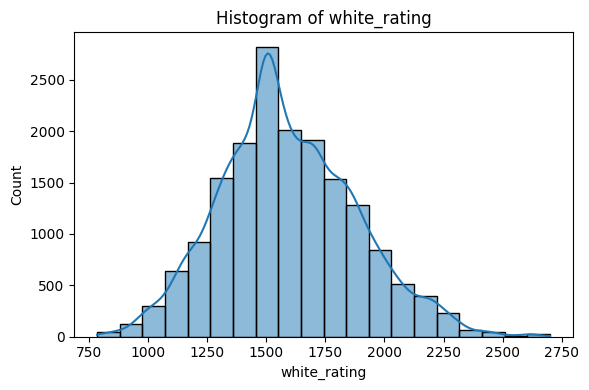

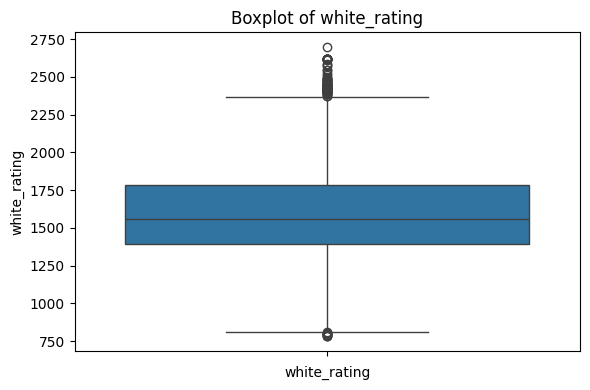

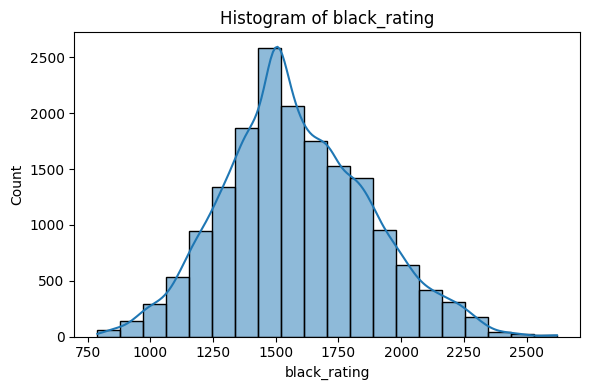

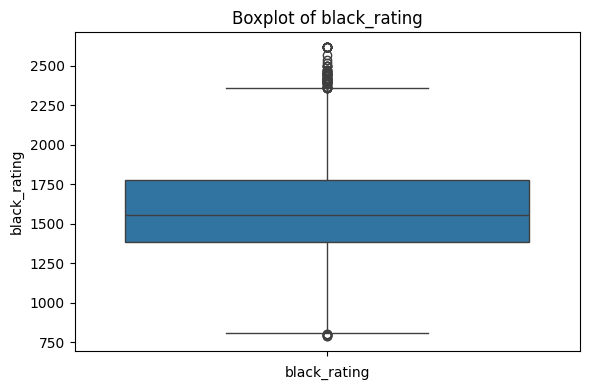

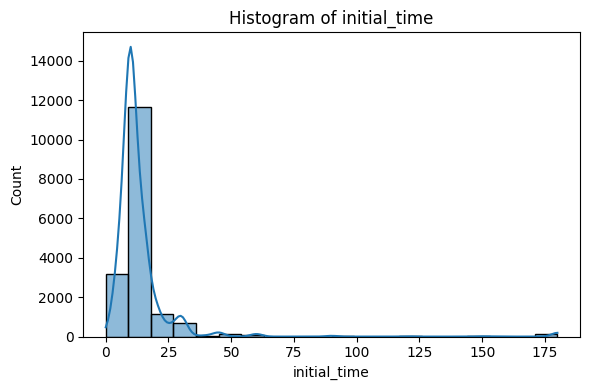

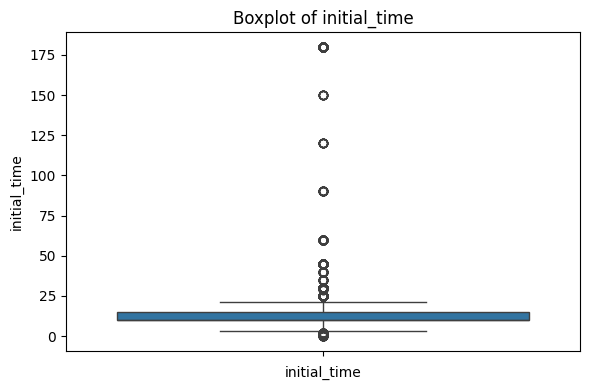

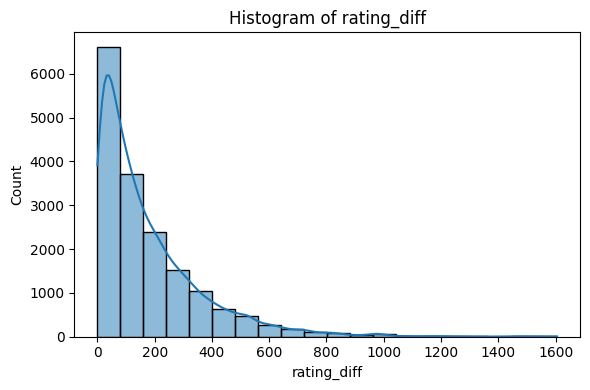

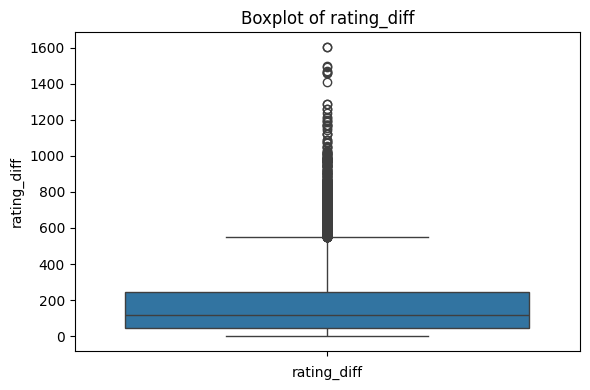

'=================================================='


In [ ]:
plot_descriptive_statistics(df=chess_df[['turns','white_rating','black_rating','initial_time','rating_diff']],uni_variate_flag=True)

In [ ]:
plot_descriptive_statistics(df=chess_df[['turns','white_rating','black_rating','initial_time','rating_diff']],descp_flag=True)

'Summary statistics:'
count : 
("{'turns': 17114.0, 'white_rating': 17114.0, 'black_rating': 17114.0, "
 "'initial_time': 17114.0, 'rating_diff': 17114.0}")

mean : 
("{'turns': 58.05212107046862, 'white_rating': 1591.7524833469674, "
 "'black_rating': 1583.864964356667, 'initial_time': 13.831190837910482, "
 "'rating_diff': 175.26136496435666}")

std : 
("{'turns': 31.461237623443203, 'white_rating': 288.13512297613266, "
 "'black_rating': 289.04224508411744, 'initial_time': 16.79968380453556, "
 "'rating_diff': 180.24064111954698}")

min : 
("{'turns': 1.0, 'white_rating': 784.0, 'black_rating': 789.0, 'initial_time': "
 "0.0, 'rating_diff': 0.0}")

25% : 
("{'turns': 36.0, 'white_rating': 1396.0, 'black_rating': 1388.0, "
 "'initial_time': 10.0, 'rating_diff': 46.0}")

50% : 
("{'turns': 53.0, 'white_rating': 1562.0, 'black_rating': 1556.0, "
 "'initial_time': 10.0, 'rating_diff': 117.0}")

75% : 
("{'turns': 75.0, 'white_rating': 1785.0, 'black_rating': 1776.0, "
 "'initial_time': 

###### Since there seems to be a lot of extreme points we will filter out some data based on a fixed window

In [ ]:
print(chess_df.shape)
chess_df=chess_df[
      (chess_df['turns']>12) &
      (chess_df['turns']<70) &
      (chess_df['white_rating']>1099) &
      (chess_df['white_rating']<2101) &
      (chess_df['black_rating']>1099) &
      (chess_df['black_rating']<2101) &
      (chess_df['initial_time']>3) &
      (chess_df['initial_time']<20) &
      (chess_df['rating_diff']>20) &
      (chess_df['rating_diff']<270)
    ]
print(chess_df.shape)

(17114, 14)
(5684, 14)


In [ ]:
(5684/17114)

0.3321257450040902

'****************************************'
'Uni-Variante Analysis'
'****************************************'
'Distribution of numerical variables:'


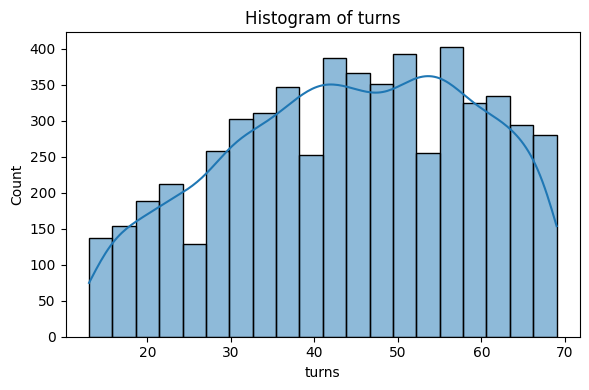

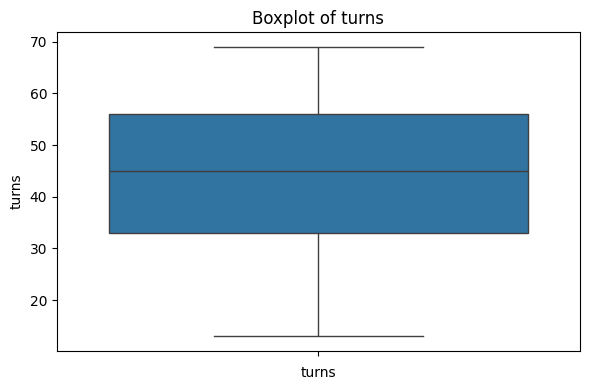

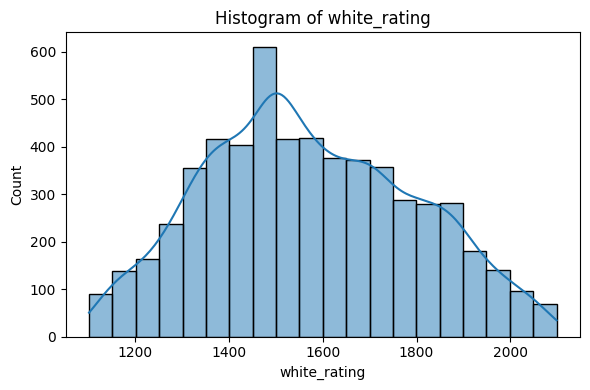

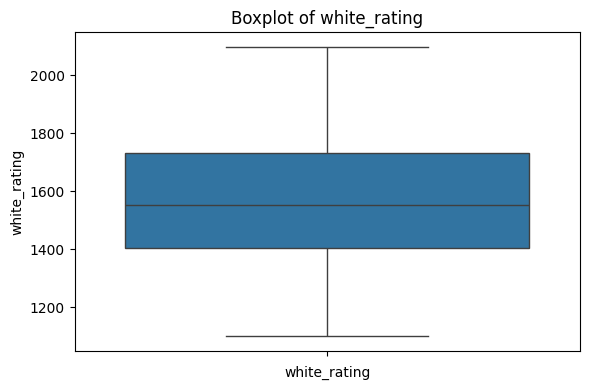

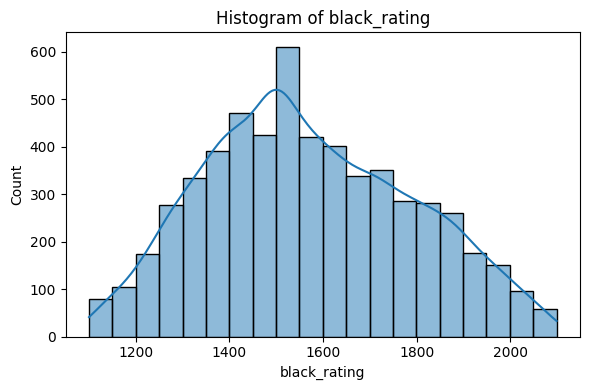

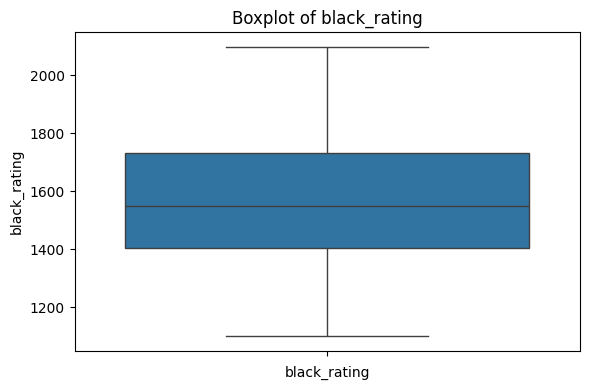

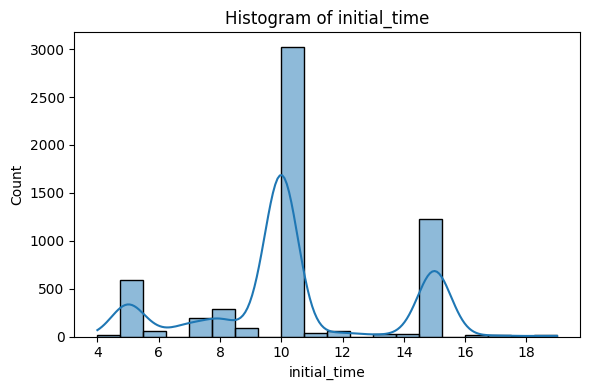

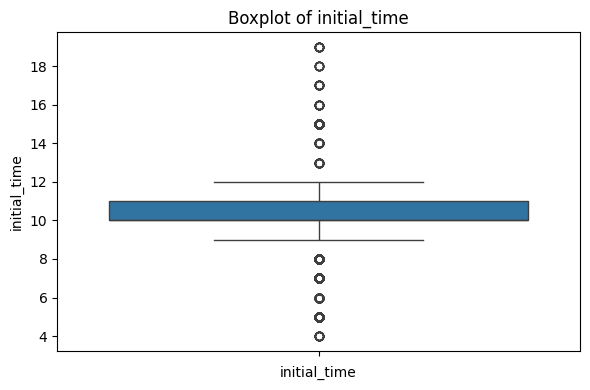

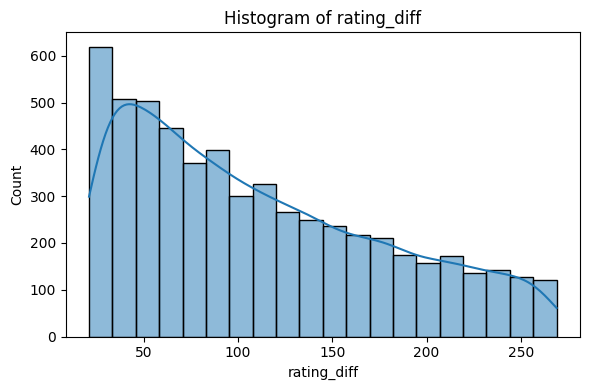

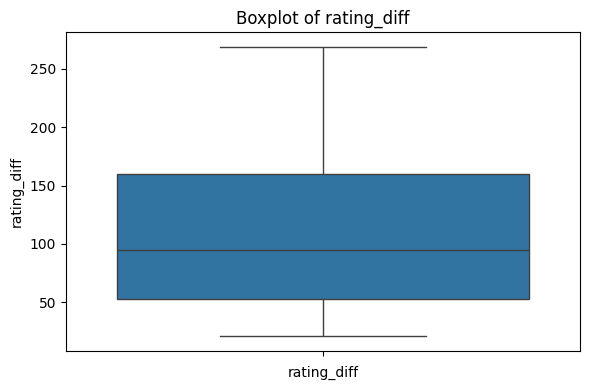

'=================================================='


In [ ]:
plot_descriptive_statistics(df=chess_df[['turns','white_rating','black_rating','initial_time','rating_diff']],uni_variate_flag=True)

In [ ]:
plot_descriptive_statistics(df=chess_df[['turns','white_rating','black_rating','initial_time','rating_diff']],descp_flag=True)

'Summary statistics:'
count : 
("{'turns': 5684.0, 'white_rating': 5684.0, 'black_rating': 5684.0, "
 "'initial_time': 5684.0, 'rating_diff': 5684.0}")

mean : 
("{'turns': 44.09113300492611, 'white_rating': 1571.9167839549614, "
 "'black_rating': 1570.1662561576354, 'initial_time': 10.40341308937368, "
 "'rating_diff': 110.60204081632654}")

std : 
("{'turns': 14.736078038984623, 'white_rating': 222.5490930735834, "
 "'black_rating': 220.55315255083303, 'initial_time': 3.045261642897883, "
 "'rating_diff': 67.65178750549101}")

min : 
("{'turns': 13.0, 'white_rating': 1101.0, 'black_rating': 1100.0, "
 "'initial_time': 4.0, 'rating_diff': 21.0}")

25% : 
("{'turns': 33.0, 'white_rating': 1403.75, 'black_rating': 1403.0, "
 "'initial_time': 10.0, 'rating_diff': 53.0}")

50% : 
("{'turns': 45.0, 'white_rating': 1552.0, 'black_rating': 1548.0, "
 "'initial_time': 10.0, 'rating_diff': 95.0}")

75% : 
("{'turns': 56.0, 'white_rating': 1734.25, 'black_rating': 1732.25, "
 "'initial_time': 1

In [ ]:
min_max_scaling:list=['initial_time','rating_diff']
standar_scaling:list=['turns','white_rating','black_rating']
dummies_columns:list=['rated','turns_binned','game_type','ECO_Names','rating_level']

min_max_scaler=MinMaxScaler().set_output(transform="pandas")
standar_scaler=StandardScaler().set_output(transform="pandas")
one_hot_encoder=OneHotEncoder(drop='first',sparse=False).set_output(transform="pandas")

min_max_scaler.fit(chess_df[min_max_scaling])
standar_scaler.fit(chess_df[standar_scaling])
one_hot_encoder.fit(chess_df[dummies_columns])

In [ ]:
chess_df=pd.concat(objs=[
    chess_df.drop(columns=min_max_scaling+standar_scaling+dummies_columns+['moves']),
    min_max_scaler.transform(chess_df[min_max_scaling]),
    standar_scaler.transform(chess_df[standar_scaling]),
    one_hot_encoder.transform(chess_df[dummies_columns]),
    ],ignore_index=False,axis=1)
print(chess_df.shape)

(17114, 64)


In [ ]:
chess_df['train_test'].value_counts()

train_test
1    14579
0     2535
Name: count, dtype: int64

In [ ]:
X_Features=chess_df.drop(columns=['winner_white'])
Y_Label=chess_df[['winner_white','train_test']]
print(X_Features.shape,Y_Label.shape)

X_train=X_Features[X_Features['train_test']==1]
X_test=X_Features[X_Features['train_test']==0]
y_train=Y_Label[Y_Label['train_test']==1]
y_test=Y_Label[Y_Label['train_test']==0]

X_train=X_train.drop(columns=['train_test'])
X_test=X_test.drop(columns=['train_test'])
y_train=y_train.drop(columns=['train_test'])
y_test=y_test.drop(columns=['train_test'])
print(f'\n{X_train.shape=},\n{X_test.shape=},\n{y_train.shape=},\n{y_test.shape=}')
del X_Features,Y_Label

(17114, 63) (17114, 2)

X_train.shape = (14579, 62),
X_test.shape = (2535, 62),
y_train.shape = (14579, 1),
y_test.shape = (2535, 1)


In [ ]:
# Principal Component Analysis (PCA)
pca_scaling=PCA(n_components=30)
pca_scaling.fit(X_train)
X_train_pca=pca_scaling.transform(X_train)
X_test_pca=pca_scaling.transform(X_test)
variance_explained=pca_scaling.explained_variance_ratio_
print(X_train_pca.shape,type(X_train_pca),X_test_pca.shape,type(X_test_pca))
for x in range(3,31,3):
  print(f'Top {x} PCs contains {round((sum(variance_explained[0:x]))*100,2)}% variation from the original data')

(14579, 30) <class 'numpy.ndarray'> (2535, 30) <class 'numpy.ndarray'>
Top 3 PCs contains 56.07% variation from the original data
Top 6 PCs contains 71.42% variation from the original data
Top 9 PCs contains 80.32% variation from the original data
Top 12 PCs contains 86.12% variation from the original data
Top 15 PCs contains 89.8% variation from the original data
Top 18 PCs contains 92.25% variation from the original data
Top 21 PCs contains 94.1% variation from the original data
Top 24 PCs contains 95.49% variation from the original data
Top 27 PCs contains 96.55% variation from the original data
Top 30 PCs contains 97.37% variation from the original data


In [ ]:
# Lasso for feature selection
lasso_clf=Lasso(alpha=0.001)
lasso_clf.fit(X_train,y_train)
important_features_list:list=[X_train.columns[i] for i in np.where(lasso_clf.coef_ > -0)[0]]
pprint(important_features_list)

['white_rating',
 'rated_True',
 'turns_binned_(96.0, 127.0]',
 'game_type_Standard',
 'ECO_Names_English',
 'ECO_Names_Philidor',
 'ECO_Names_Pirc']


### Traditional Machine Learning Method

In [ ]:
traditional_models:dict={
  # Tree Based Models
  "AdaBoost" : AdaBoostClassifier(),
  "Bagging Classifier" : BaggingClassifier(),
  "Decision Tree" : DecisionTreeClassifier(),
  "Extra Trees" : ExtraTreesClassifier(),
  "Gradient Boosting" : GradientBoostingClassifier(),
  "Random Forest" : RandomForestClassifier(),

  # Linear Models
  "Linear Discriminant Analysis" : LinearDiscriminantAnalysis(),
  "Logistic Regression" : LogisticRegression(),
  "Passive Aggressive Classifier" : PassiveAggressiveClassifier(),
  "Perceptron" : Perceptron(),
  "Ridge Classifier" : RidgeClassifier(),
  "Stochastic Gradient Descent" : SGDClassifier(),

  # Other Models
  "Gaussian Naive Bayes" : GaussianNB(),
  "Nearest Centroid" : NearestCentroid(),
  "Quadratic Discriminant Analysis" : QuadraticDiscriminantAnalysis(),
  "K-Nearest Neighbors" : KNeighborsClassifier(),
  "SVM (Linear)" : SVC(kernel='linear'),
  "SVM (RBF)" : SVC(kernel='rbf'),

}

feature_importance_names:list=[]
feature_importance_scores:list=[]

def plot_feature_importance(df,n)->None:
  plt.figure(figsize=(10,6))
  sns.barplot(x='Feature_Score',y='Feature_Name',data=df.head(n))
  plt.title('Feature Importances')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.show()
  return None

def get_evaluation_metrics(true_pred,test_pred)->tuple:
  precision=round(number=(precision_score(true_pred,test_pred)),ndigits=4)
  recall=round(number=(recall_score(true_pred,test_pred)),ndigits=4)
  accuracy=round(number=(accuracy_score(true_pred,test_pred)),ndigits=4)
  f1_scr=round(number=(f1_score(true_pred,test_pred)),ndigits=4)
  return precision,recall,accuracy,f1_scr

def train_model(xtrain_records,ytrain_records,xtest_records,ytest_records)->list:
  # training different models
  method_names=[]
  precs=[]
  recal=[]
  acc=[]
  f1s=[]
  print('Models Running : ',time.ctime())
  # Initialize models
  for model_name,model1 in traditional_models.items():
      try:
        model1.fit(xtrain_records,ytrain_records)
        p,r,a,f=get_evaluation_metrics(true_pred=ytest_records,test_pred=model1.predict(xtest_records))
        method_names.append(model_name)
        precs.append(p)
        recal.append(r)
        acc.append(a)
        f1s.append(f)
        if model_name in ["AdaBoost","Decision Tree","Extra Trees","Gradient Boosting","Random Forest"]:
          try:
              feature_importance_names.extend(list(xtrain_records.columns))
              feature_importance_scores.extend(list(model1.feature_importances_))
          except Exception:
            pass
        else:
          pass
        print(model_name,time.ctime())
      except Exception:
        pass
  return method_names,precs,recal,acc,f1s

In [ ]:
feature_importance_names:list=[]
feature_importance_scores:list=[]

method_names_list,precision_list,recall_list,accuracy_list,f1_list=train_model(xtrain_records=X_train[selected_features],ytrain_records=y_train,xtest_records=X_test[selected_features],ytest_records=y_test)

all_features_fit_summary=pd.DataFrame(
    data={
          "ML Model":method_names_list,
          "Precision":precision_list,
          "Recall":recall_list,
          "Accuracy":accuracy_list,
          "F1":f1_list,
          }
    ).sort_values(by=['F1','Precision','Recall','Accuracy','ML Model'],ascending=[False,False,False,False,True])
all_features_fit_summary['Features']='Scaled Features'

Models Running :  Tue Apr 23 04:35:38 2024
AdaBoost Tue Apr 23 04:35:38 2024
Bagging Classifier Tue Apr 23 04:35:39 2024
Decision Tree Tue Apr 23 04:35:39 2024
Extra Trees Tue Apr 23 04:35:41 2024
Gradient Boosting Tue Apr 23 04:35:42 2024
Random Forest Tue Apr 23 04:35:46 2024
Linear Discriminant Analysis Tue Apr 23 04:35:46 2024
Logistic Regression Tue Apr 23 04:35:46 2024
Passive Aggressive Classifier Tue Apr 23 04:35:47 2024
Perceptron Tue Apr 23 04:35:47 2024
Ridge Classifier Tue Apr 23 04:35:47 2024
Stochastic Gradient Descent Tue Apr 23 04:35:47 2024
Gaussian Naive Bayes Tue Apr 23 04:35:47 2024
Nearest Centroid Tue Apr 23 04:35:47 2024
Quadratic Discriminant Analysis Tue Apr 23 04:35:47 2024
K-Nearest Neighbors Tue Apr 23 04:35:47 2024
SVM (Linear) Tue Apr 23 04:36:03 2024
SVM (RBF) Tue Apr 23 04:36:21 2024


In [ ]:
all_features_fit_summary

,ML Model,Precision,Recall,Accuracy,F1,Features
4,Gradient Boosting,0.7303,0.7796,0.7325,0.7542,Scaled Features
16,SVM (Linear),0.6118,0.8801,0.6430,0.7218,Scaled Features
9,Perceptron,0.5755,0.8996,0.5980,0.7020,Scaled Features
11,Stochastic Gradient Descent,0.6311,0.7886,0.6462,0.7011,Scaled Features
5,Random Forest,0.6950,0.6987,0.6801,0.6968,Scaled Features
6,Linear Discriminant Analysis,0.6548,0.7151,0.6517,0.6836,Scaled Features
10,Ridge Classifier,0.6548,0.7151,0.6517,0.6836,Scaled Features
0,AdaBoost,0.6488,0.7091,0.6450,0.6777,Scaled Features
7,Logistic Regression,0.6598,0.6964,0.6513,0.6776,Scaled Features
12,Gaussian Naive Bayes,0.6263,0.7211,0.6268,0.6704,Scaled Features


In [ ]:
feature_importance_df=pd.DataFrame(data={'Feature_Name':feature_importance_names,'Feature_Score':feature_importance_scores,})
print(feature_importance_df.shape)
feature_importance_df=feature_importance_df.groupby(by=['Feature_Name'])['Feature_Score'].agg('sum').reset_index().sort_values(by=['Feature_Score'],ascending=[False])
print(feature_importance_df.shape)

(45, 2)
(9, 2)


In [ ]:
print(feature_importance_df.to_string())

              Feature_Name  Feature_Score
7                    turns       1.493852
8             white_rating       1.292130
0             black_rating       1.239139
4              rating_diff       0.675556
3             initial_time       0.234619
2       game_type_Standard       0.029923
6  rating_level_Mid Rating       0.016528
5  rating_level_Low Rating       0.014434
1         game_type_Bullet       0.003820


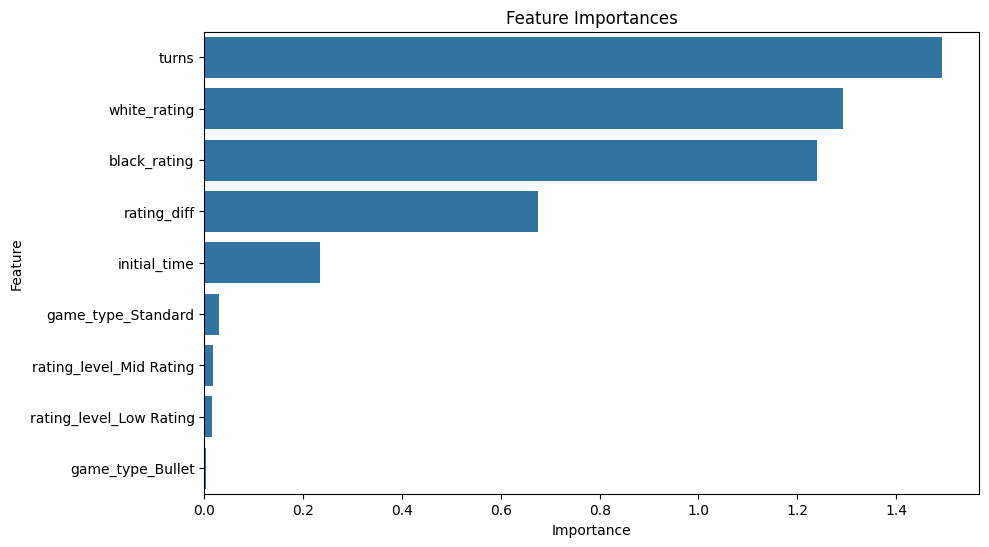

In [ ]:
plot_feature_importance(df=feature_importance_df,n=10)

In [ ]:
all_features_fit_summary

,ML Model,Precision,Recall,Accuracy,F1,Features
4,Gradient Boosting,0.7303,0.7796,0.7325,0.7542,Scaled Features
16,SVM (Linear),0.6118,0.8801,0.6430,0.7218,Scaled Features
9,Perceptron,0.5755,0.8996,0.5980,0.7020,Scaled Features
11,Stochastic Gradient Descent,0.6311,0.7886,0.6462,0.7011,Scaled Features
5,Random Forest,0.6950,0.6987,0.6801,0.6968,Scaled Features
6,Linear Discriminant Analysis,0.6548,0.7151,0.6517,0.6836,Scaled Features
10,Ridge Classifier,0.6548,0.7151,0.6517,0.6836,Scaled Features
0,AdaBoost,0.6488,0.7091,0.6450,0.6777,Scaled Features
7,Logistic Regression,0.6598,0.6964,0.6513,0.6776,Scaled Features
12,Gaussian Naive Bayes,0.6263,0.7211,0.6268,0.6704,Scaled Features


In [ ]:
print(tabulate(tabular_data=all_features_fit_summary.head(10),headers="keys",tablefmt="rounded_grid"))

╭────┬──────────────────────────────┬─────────────┬──────────┬────────────┬────────┬─────────────────╮
│    │ ML Model                     │   Precision │   Recall │   Accuracy │     F1 │ Features        │
├────┼──────────────────────────────┼─────────────┼──────────┼────────────┼────────┼─────────────────┤
│  4 │ Gradient Boosting            │      0.7303 │   0.7796 │     0.7325 │ 0.7542 │ Scaled Features │
├────┼──────────────────────────────┼─────────────┼──────────┼────────────┼────────┼─────────────────┤
│ 16 │ SVM (Linear)                 │      0.6118 │   0.8801 │     0.643  │ 0.7218 │ Scaled Features │
├────┼──────────────────────────────┼─────────────┼──────────┼────────────┼────────┼─────────────────┤
│  9 │ Perceptron                   │      0.5755 │   0.8996 │     0.598  │ 0.702  │ Scaled Features │
├────┼──────────────────────────────┼─────────────┼──────────┼────────────┼────────┼─────────────────┤
│ 11 │ Stochastic Gradient Descent  │      0.6311 │   0.7886 │     0.6462

In [ ]:
# Questions:

# What kind of features could be added in the dataset? (Feature Engineering)

# Which metric should be prioritized Precision or Recall? Why?

# Where do you think this model can fit? Why?

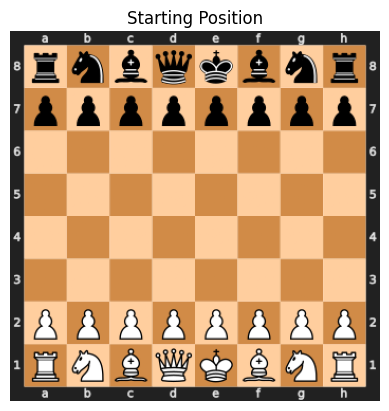

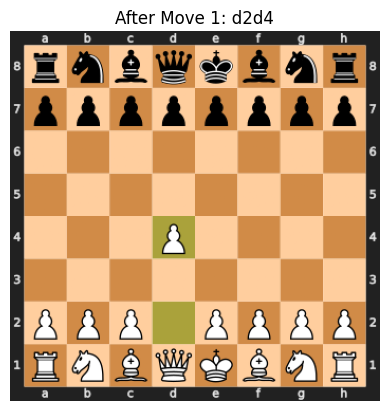

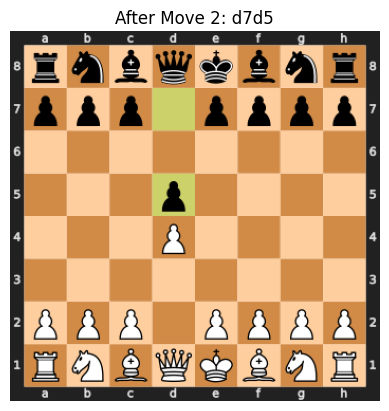

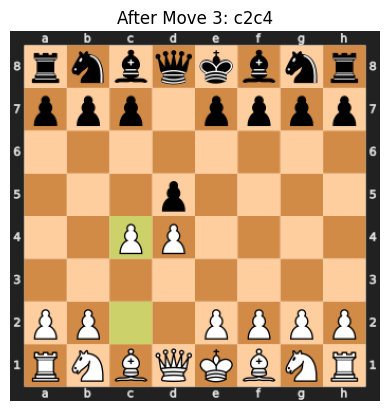

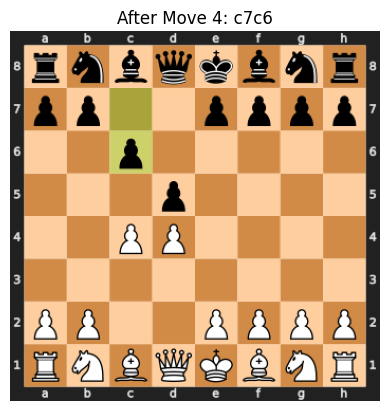

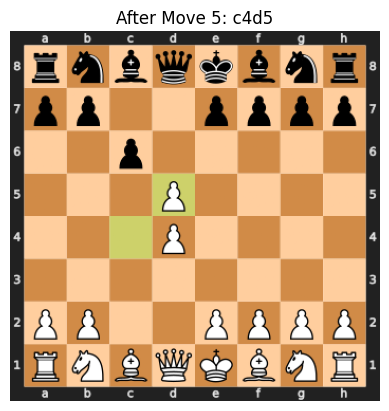

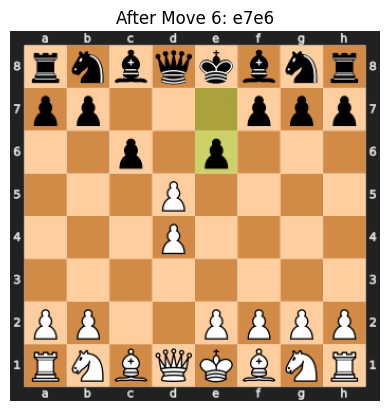

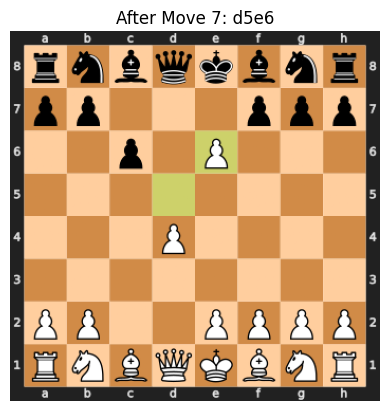

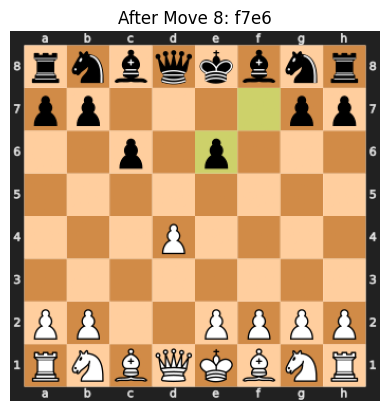

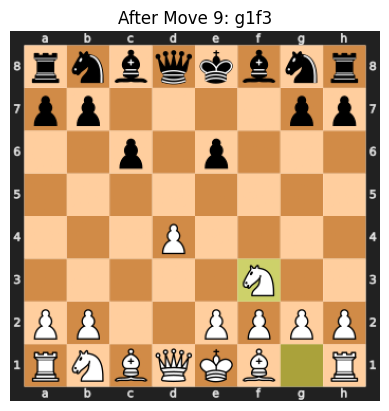

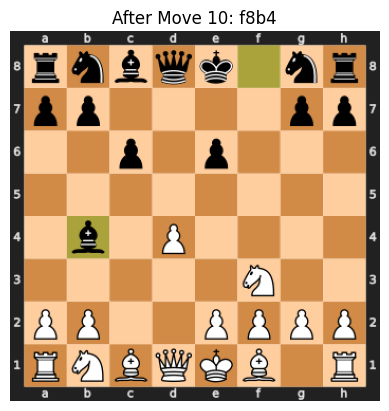

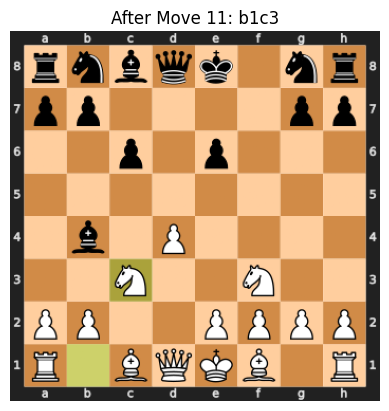

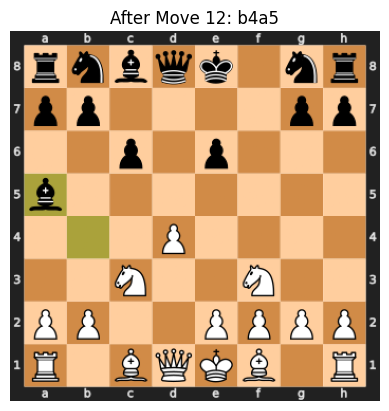

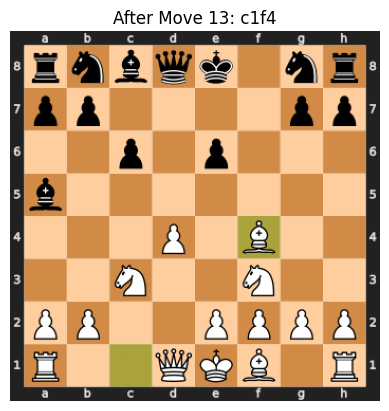

In [ ]:
# https://python-chess.readthedocs.io/en/latest/
# https://www.geeksforgeeks.org/chess-library-in-python/
# https://cairosvg.org/documentation/
# https://snyk.io/advisor/python/CairoSVG/example
# https://www.w3.org/TR/SVG11/coords.html
# https://snyk.io/advisor/python/CairoSVG/functions/cairosvg.svg2png
# https://mike632t.wordpress.com/2021/02/27/rendering-svg-graphics-in-python/
# https://www.programcreek.com/python/example/90069/cairosvg.svg2png

import chess
import chess.svg
import cairosvg
import matplotlib.pyplot as plt
import io

def display_chess_board(board, move_num=None):
    svg_data = chess.svg.board(board, lastmove=board.peek() if move_num else None, size=350)
    png_data = cairosvg.svg2png(bytestring=svg_data.encode("utf-8"))
    image = io.BytesIO(png_data)
    plt.imshow(plt.imread(image))
    plt.axis('off')
    if move_num:
        plt.title(f"After Move {move_num}")
    else:
        plt.title("Starting Position")
    plt.show()

board = chess.Board()
display_chess_board(board)

moves = ["d4", "d5", "c4", "c6", "cxd5", "e6", "dxe6", "fxe6", "Nf3", "Bb4+", "Nc3", "Ba5", "Bf4"]
for i,move in enumerate(moves):
    board.push_san(move)
    display_chess_board(board, i + 1)